### # VIPatAINEAI

# Virtual Internship Program by AINE.AI

<img src="images.jpg" width="100" height="100" align="left"/> 
<img src="data science.png" width="150" height="150" align="left"/>
<img src="cookiescat.png" width="100" height="100" align="left"/>

# Statistical Analysis and Hypothesis Testing

## Project:
## Increasing YoY revenue from game purchases by increasing retention rate of gamers

### Submitted By : Manjiri Harishchandra Sawant

## About the Project

* The project involves working on data related to **Cookie Cats** – a hugely popular puzzle game. 
* As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. 
* In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in the player's enjoyment of the game being increased and prolonged. 
* But where should the gates be placed and how the placement of the gates can retain the players for more time.

#### Retention Rate?
   -  The term **"retention rate"** is used in a variety of fields, including marketing, investing, education, in the workplace and in clinical trials. Maintaining retention in each of these fields often results in a positive outcome for the overall organization or school, or pharmacological study.
   - Basically, **game retention** is a measure of how many people are still playing the game after a certain period of time from their first login date. 
   - For example: if 10000 people download game today and 5700 of them are still playing tomorrow, it means they have a retention of 57 percent on day 1.

<img src="screen-4.jpg" width="220" height="220" align="left"/> 
<img src="screen-0.jpg" width="220" height="250" align="left"/> 
<img src="screen-13.jpg" width="220" height="280" align="left"/>
<img src="643x0w.jpg" width="250" height="280" align="left"/>

**Tool Used** : Python Jupyter Notebook

**Aim** : Even though the overall subscription for the game is growing, the revenue from in-game purchases has been declining and many players are uninstalling the game after playing for a few days. **Give suggestions to increase the in-game purchase and retaining the players.**

**Objectives**:

1. The overall objective of the project is to test the **company’s CEO’s hypothesis** that moving the first gate from **level 30 to level 40** increases retention rate and the number of game rounds played. 
2. The CEO believes that players are churning because the first gate encountered at level 30 is too early which forces players to wait before they can proceed further in the game.
3.  In order to increase **player retention rate**, the main objective is to run **AB-test** by moving the first gate from level 30 to level 40 for some players i.e.,

  -	group A would encounter the gate at level 30, and
  -	group B would encounter the gate at level 40


#### A/B Testing?
1. A/B testing **(also known as split testing or bucket testing)** is a method of comparing two versions of a webpage or app against each other to determine which one performs better.
2. A/B testing for mobile apps works by segmenting an audience into two (or more) groups and seeing how a variable affects user behavior. 
3. It is used to identify the best possible user experience and deliver the best possible results.

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore',category=FutureWarning)

## Performing Initial Data Preparation

### Reading data and initial processing

In [2]:
#Read data using pandas
user_df=pd.read_csv("cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<img src="shot 1.png" width="700" height="700" align="left"/>

## Detect and resolve problems in the data (Missing value, Outliers, etc.)

### 1. Identify missing value

In [3]:
#Check for any missing values in the data using isnull() function
user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### 2. Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

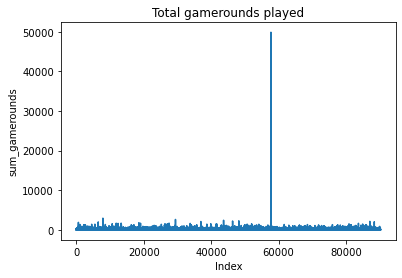

In [4]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [5]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

user_df['sum_gamerounds'].max()

display(user_df.loc[user_df.sum_gamerounds == 49854])

user_df.drop([user_df.index[57702]], inplace = True)

49854

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

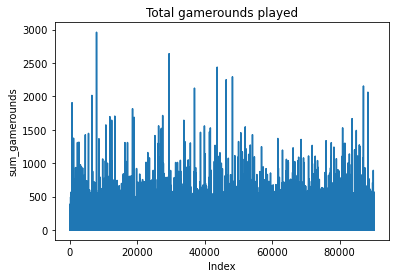

In [6]:
#Plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

## Generate Statistical Summary

### 1. What is the overall 7-day retention rate of the game?

In [7]:
#Insert calculation for 7-day retention rate

retention_rate_7= (user_df.retention_7.sum()/user_df.shape[0] * 100).round(2)

print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overal 7 days retention rate of the game for both versions is:  18.61 %


<mark>__Ans__
#### Overall 7-day retention rate of the game is 18.61%.

### 2. How many players never played the game after installing? 

In [8]:
# Find number of customers with sum_gamerounds is equal to zero

No_of_customers = user_df.loc[user_df.sum_gamerounds == 0]['sum_gamerounds'].count()

print("The number of customers with sum_gamerounds is equal to zero : ", No_of_customers)

The number of customers with sum_gamerounds is equal to zero :  3994


<mark>__Ans.__
#### Total 3994 number of players never played the game after installing.

### 3. Does the number of users decrease as the level progresses highlighting the difficulty of the game?

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'count of players')

Text(0.5, 1.0, 'Count of Player Vs sum_gamerouds')

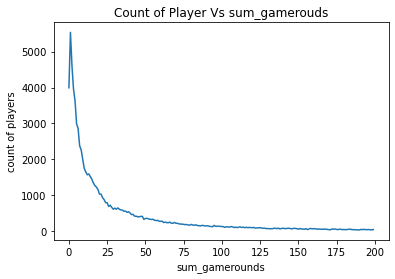

In [9]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart

new_data  = user_df[["userid","sum_gamerounds"]].groupby("sum_gamerounds").count().reset_index().rename(columns = {"userid":"count"})[0:200]

plt.xlabel("sum_gamerounds")
plt.ylabel("count of players")

plt.title("Count of Player Vs sum_gamerouds")
plt.plot(new_data["sum_gamerounds"],new_data["count"])

## Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### 1. Seven days retention rate summary for different game versions

In [10]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
#### There is negligible difference among the two groups. In both the case, majority of the players(~ 80%) quit the game after 7 days period.

### 2. Gamerounds summary for different game versions

In [11]:
#use pandas group by to calculate average game rounds played summarized by different versions

user_df.groupby(['version']).agg({'sum_gamerounds': ['mean']})

,sum_gamerounds
,mean
version,
gate_30,51.342111
gate_40,51.298776


<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 
    
#### There is no much a difference in the total number of gamerounds of two different versions of the game played by each player.

## Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

#### Hypothesis Testing?

1. **Hypothesis testing** is a part of statistical analysis, where we test the assumptions made regarding a population parameter.It is generally used when we were to compare:
    - a single group with an external standard
    - two or more groups with each other
    
2. Terminology Used:
    - Null Hypothesis
    - Alternate Hypothesis
    - Level of significance
    - p-value

### Initial data processing

In [12]:
#Define A/B groups for hypothesis testing
# user_df["version"] = np.where(user_df.version == "gate_30", "A","B")

user_df["version"] = user_df["version"].replace(["gate_30","gate_40"],["A","B"])

group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])



### 1. Shapiro test of Normality

* The Shapiro-Wilks test for normality is one of three general normality tests designed to detect all departures from normality.
* The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05.

In [13]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    


#test for group_A
stats.shapiro(group_A)

#test for group_B
stats.shapiro(group_B)



ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

ShapiroResult(statistic=0.4825654625892639, pvalue=0.0)

<mark>__Analsysis Results:__
are the two groups normally distributed?
    
#### According to Shapiro test of Normality, Null hypothesis is rejected ie distribution is normal because p-value is less than 0.05.
#### Yes Distribution is not normal H1 is accepted.

### 2. Test of homegienity of variance

* Levene's test is used to test if k samples have equal variances. Equal variances across samples is called homogeneity of variance.
* The Levene test can be used to verify that assumption.

In [14]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results

from scipy.stats import levene

levene(group_A.sum_gamerounds,group_B.sum_gamerounds)

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
    
#### The p-value suggest that we fail to reject the null hypothesis that, group A and B both have equal vairances.

### 3. Test of significance: Two sample test

* The two-sample t-test (also known as the independent samples t-test) is a method used to test whether the unknown population means of two groups are equal or not.
* A two-sample t-test is used to analyze the results from A/B tests.

In [15]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.mannwhitneyu(group_A.sum_gamerounds, group_B.sum_gamerounds)

MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

In [16]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: The first sample is greater than the second sample

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.mannwhitneyu(group_A.sum_gamerounds, group_B.sum_gamerounds, alternative = "greater")

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    
 - We have used mann-whitney u test to check the null hypothesis, whether the two groups are similar or different. 
 - We have repeated the mann-whitney u test with the same null hypothesis but with the alternate hypothesis being whether the first group is greater than the second group. 
 -The results make it clear that the group_A and group_B are statistically different.

## Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played.

In [17]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function


user_df[["version","retention_7","retention_1"]].groupby("version").agg("mean")

,retention_7,retention_1
version,,
A,0.190183,0.448198
B,0.182000,0.442283


<mark>__Analsysis Results:__
    
#### Based on the significance test we can conclude that gate level 30 has higher retention rate.

## Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

* The bootstrapping is a way of sampling data.
* Bootstrapping is a statistical method that uses data resampling with replacement.

Text(0.5, 0, '% difference in means')

Text(0.5, 0, '% difference in means')

'93.2%'

'99.8%'

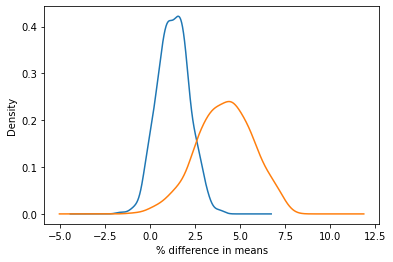

In [18]:
list_1d = []
list_2d = []

for i in range(500):
    boot_mean1 = user_df.sample(frac = 0.7, replace = True).groupby('version')['retention_1'].mean()
    list_1d.append(boot_mean1.values)
    
    boot_mean2 = user_df.sample(frac = 0.7, replace  = True).groupby('version')['retention_7'].mean()
    list_2d.append(boot_mean2.values)
    
# Transforming the list to a DataFrame

list_1d = pd.DataFrame(list_1d, columns = ['gate_30','gate_40'])

list_2d = pd.DataFrame(list_2d, columns = ['gate_30','gate_40'])


# Adding a column with the % difference between the two AB groups
list_1d['diff'] = (list_1d['gate_30'] - list_1d['gate_40']) /  list_1d['gate_30'] * 100
list_2d['diff'] = (list_2d['gate_30'] - list_2d['gate_40']) /  list_2d['gate_30'] * 100

# Ploting the bootstrap % difference
ax = list_1d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

ax = list_2d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30

prob_1 = (list_1d['diff'] > 0).sum() / len(list_1d)

prob_2 = (list_2d['diff'] > 0).sum() / len(list_2d)

# printing the probability
'{:.1%}'.format(prob_1)
'{:.1%}'.format(prob_2)

### The Conclusion:
* There is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40. 
* The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40.